# DH Matrix

## Description of DH parameters

### **d** : offset along previous z to the common normal
translation: move along Z_n-1 axis **d** distance
### **&theta;** : angle about previous z, from old x to new x
translation: rotate Z_n-1 axis **theta** degree
### **&gamma;** : length of the common normal
translation: move along X_n axis **&gamma;** distance
### **&alpha;** : angle about common normal, from old z axis to new z axis
translation: rotate X_n axis **alpha**

## Implementation

![](pic_resource/dh_example.png)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from mpl_toolkits import mplot3d
from math import cos, sin
from math import sqrt

In [2]:
# Define DH function
def dh_matrix(theta, d, gama, alpha):
    T_1 = np.array([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), gama*cos(theta)],
                    [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), gama*sin(theta)],
                    [0,sin(alpha), cos(alpha), d],
                    [0, 0, 0, 1]])
    return T_1

p 0  at [0. 0. 0.]
p 1  at [0. 0. 5.]
p 2  at [3. 0. 5.]
p 3  at [5. 0. 5.]
p 4  at [5. 0. 3.]


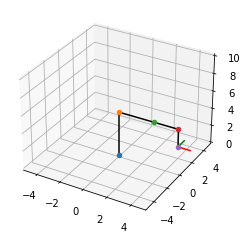

In [3]:
# Set p0 at (0, 0, 0)
p0 = np.array([0., 0., 0., 1.])

# Set fixed length
Z  = 4
L1 = 3
L2 = 2
T  = 2

# Set translation length q1 and rotation degree q2, q3, q4
q1 = 1
q2, q3, q4 = 0, 0, 0

# Determine position of each joint
p1 = dh_matrix(0, Z+q1, 0, 0) @ p0
p2 = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ p0
p3 = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ p0
p4 = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(q4, -T, 0, 0) @ p0

# Determine final joint x, y
p4_x = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(q4, -T, 0, 0) @ dh_matrix(0, 0, 1, 0) @ p0
p4_y = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(q4, -T, 0, 0) @ dh_matrix(pi/2, 0, 1, 0) @ p0
 

p = np.asarray([p0.T, p1.T, p2.T, p3.T, p4.T])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);


# Plot in 3D
for i in range(p.shape[0]):
    print('p', i, ' at', p[i][0:3])
    ax.scatter3D(p[i][0], p[i][1], p[i][2])
    if i != 0:
        ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')
        
ax.plot3D([p4[0], p4_x[0]], [p4[1], p4_x[1]], [p4[2], p4_x[2]], 'r')
ax.plot3D([p4[0], p4_y[0]], [p4[1], p4_y[1]], [p4[2], p4_y[2]], 'g')

## Interaction with DH parameters

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def dh_interact(q1, q2, q3, q4):
    # Set p0 at (0, 0, 0)
    p0 = np.array([0., 0., 0., 1.])

    # Set fixed length
    Z  = 4
    L1 = 3
    L2 = 2
    T  = 2

    # Determine position of each joint
    p1 = dh_matrix(0, Z+q1, 0, 0) @ p0
    p2 = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ p0
    p3 = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ p0
    p4 = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(q4, -T, 0, 0) @ p0

    # Determine final joint x, y
    p4_x = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(q4, -T, 0, 0) @ dh_matrix(0, 0, 1, 0) @ p0
    p4_y = dh_matrix(0, Z+q1, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(q4, -T, 0, 0) @ dh_matrix(pi/2, 0, 1, 0) @ p0
 
    p = np.asarray([p0.T, p1.T, p2.T, p3.T, p4.T])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);
    
    for i in range(p.shape[0]):
        ax.scatter3D(p[i][0], p[i][1], p[i][2])
        if i != 0:
            ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')
    
    ax.plot3D([p4[0], p4_x[0]], [p4[1], p4_x[1]], [p4[2], p4_x[2]], 'r')
    ax.plot3D([p4[0], p4_y[0]], [p4[1], p4_y[1]], [p4[2], p4_y[2]], 'g')

# Interactive function
interactive_plot = interactive(dh_interact, q1=(0, 4), q2=(-pi, pi), q3=(-pi, pi), q4=(-pi, pi))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=2, description='q1', max=4), FloatSlider(value=0.0, description='q2', ma…

## Plot Working Space of the robot arm

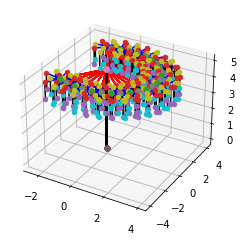

In [5]:
# Define limit of q2 and q3
test_q2 = np.arange(-120, 120, 10) / 180 * pi
test_q3 = np.arange(0, 300, 36) / 180 * pi

# Set origin and hardware parameters
p0 = np.array([0., 0., 0., 1.])
Z = 5
L1 = 3
L2 = 1
T = 1

fig = plt.figure()
ax = plt.axes(projection='3d')

# Iterate through possible combination
for k in range(len(test_q2)):
    for j in range(len(test_q3)):
        
        q1, q2, q3, q4 = 0, test_q2[k], test_q3[j], 0

        H_01 = dh_matrix(0, Z, 0, 0)
        H_02 = H_01 @ dh_matrix(q2, 0, L1, 0)
        H_03 = H_02 @ dh_matrix(q3, 0, L2, 0) 
        H_04 = H_03 @ dh_matrix(q4, -T, 0, 0) 

        p1 = H_01 @ p0
        p2 = H_02 @ p0
        p3 = H_03 @ p0
        p4 = H_04 @ p0

        p = np.asarray([p0.T, p1.T, p2.T, p3.T, p4.T])

        for i in range(p.shape[0]):
            ax.scatter3D(p[i][0], p[i][1], p[i][2])
            if i == 2:
                ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'r')
            if i == 3:
                ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'b')
            elif i==1 or i == 4:
                ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')

# Exercise Forward Transformation

![](pic_resource/dh_exercise.png)

**DH parameter**

| | theta | d | r | alpha |
|:-:|:-:|:-:|:-:|:-:|
|0_T_1|q1+&pi;/2|h1|0|+&pi;/2|
|1_T_2|q2|l|0|-&pi;/2|
|2_T_3|-&pi;/2|h2+q3|0|0|
|3_T_tcp|0|h3|0|0|


In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def dh_exercise(q1, q2, q3):
    # Set p0 at (0, 0, 0)
    p0 = np.array([0., 0., 0., 1.])

    # Set fixed length
    h1, h2, h3, l = 4, 2, 1, 4

    T_01 = dh_matrix(q1+pi/2, h1, 0, pi/2)
    T_12 = dh_matrix(q2, l, 0, -pi/2)
    T_23 = dh_matrix(-pi/2, h2+q3, 0, 0)
    T_3tcp = dh_matrix(0, h3, 0, 0)

    H_01 = T_01
    H_02 = H_01 @ T_12
    H_03 = H_02 @ T_23
    H_04 = H_03 @ T_3tcp

    p0 = np.array([0., 0., 0., 1.])
    p1 = H_01 @ p0
    p2 = H_02 @ p0
    p3 = H_03 @ p0
    ptcp = H_04 @ p0
    
    p = np.asarray([p0.T, p1.T, p2.T, p3.T, ptcp.T])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim(-10, 10); ax.set_ylim(-10, 10); ax.set_zlim(0, 10);
    
    for i in range(p.shape[0]):
        ax.scatter3D(p[i][0], p[i][1], p[i][2])
        if i != 0:
            ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')

# Interactive functino
interactive_plot = interactive(dh_exercise, q1=(-pi, pi), q2=(-pi, pi), q3=(0, 4))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='q1', max=3.141592653589793, min=-3.141592653589793),…